In [2]:
import numpy as np
import pandas as pd

import requests
import json,os,datetime
import csv
from pandas import DataFrame
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns #for beautiful plots
%matplotlib inline
from sklearn import decomposition

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [6]:
data = pd.read_csv('data/clean_data.csv')

In [7]:
data

,Absolute Magnitude,Est Dia in KM(min),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,16436,788947200000,6.115834,0.419483,17,5,0.025282,4.634,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.300,0.146068,16436,788947200000,18.113985,0.383014,21,3,0.186935,5.457,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.300,0.231502,16443,789552000000,7.590711,0.050956,22,0,0.043058,4.557,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.400,0.008801,16450,790156800000,11.173874,0.285322,7,6,0.005512,5.093,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.600,0.127220,16450,790156800000,9.840831,0.407832,25,1,0.034798,5.154,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,24357,1473318000000,22.154265,0.041361,4,8,0.019777,5.156,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,28.200,0.006089,24357,1473318000000,3.225150,0.006469,2,6,0.006451,5.742,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,22.700,0.076658,24357,1473318000000,7.191642,0.061009,17,6,0.059973,4.410,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,24357,1473318000000,11.352090,0.260760,6,5,0.177510,4.477,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [8]:
labels = np.array(data['Hazardous'])

In [9]:
labels

array([ True, False,  True, ..., False, False, False])

In [10]:
y = [1 if L else 0 for L in labels]

In [11]:
X = data.drop(columns=['Hazardous'])

In [12]:
data.keys()

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [13]:
X.keys()

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')

In [14]:
pca = decomposition.PCA(n_components=4)

In [15]:
pca.fit(X)

PCA(n_components=4)

In [18]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 4.37855979e-17 3.43410492e-18 5.83145976e-19]


In [19]:
Xs = X[['Absolute Magnitude', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion']]

In [20]:
pca.fit(Xs)

PCA(n_components=4)

In [21]:
print(pca.explained_variance_ratio_)

[0.90069492 0.07182909 0.0119944  0.00573047]


In [22]:
R = pca.transform(Xs)

In [23]:
R.shape

(4687, 4)

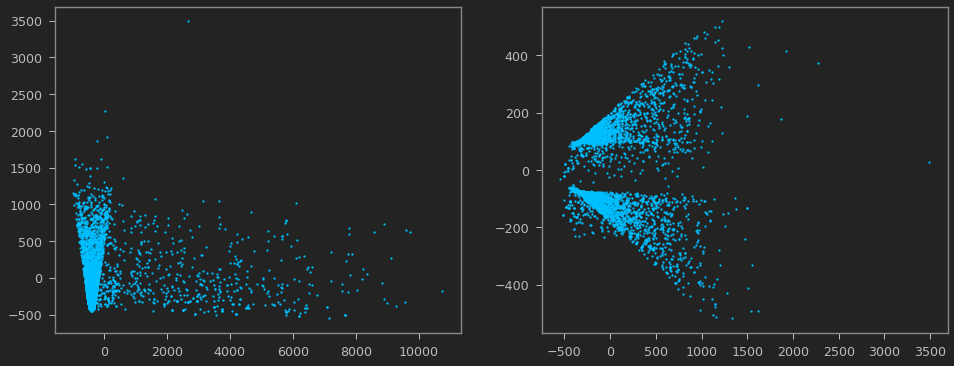

In [26]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)
ax[0].scatter(R[:,0], R[:,1], color='deepskyblue', s=4)

ax[1].scatter(R[:,1], R[:,2], color='deepskyblue', s=4)


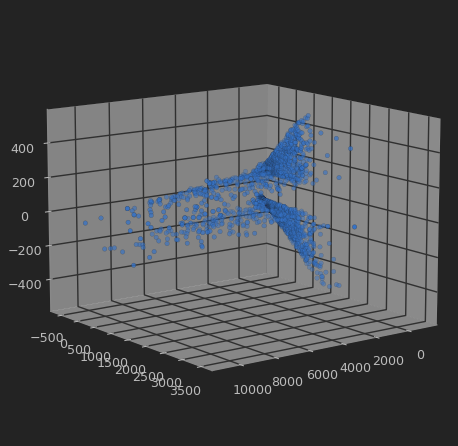

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=12, azim=53)

ax.scatter(R[:, 0], R[:, 1], R[:, 2], cmap=plt.cm.terrain, edgecolor='k')

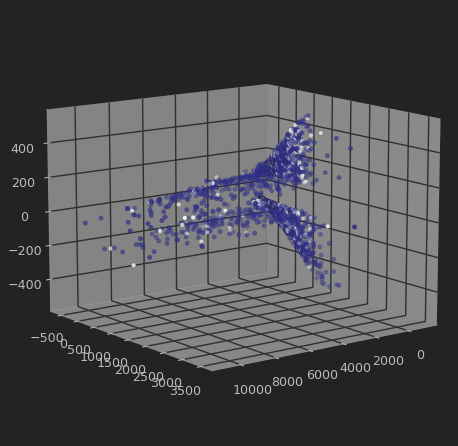

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=12, azim=53)

ax.scatter(R[:, 0], R[:, 1], R[:, 2], c=y, cmap=plt.cm.terrain, edgecolor='k')

In [42]:
df = pd.DataFrame(R[:,0:3], columns=['x','y','z'])

In [43]:
df

,x,y,z
0,-504.970323,-16.598790,-133.328894
1,-244.630200,-206.334872,139.835446
2,-474.906222,14.324265,-120.273266
3,-319.237172,-112.187827,125.534273
4,-257.066266,-133.935557,146.900739
...,...,...,...
4682,70.338698,-181.949438,-99.780737
4683,-455.733264,-219.689389,-96.331269
4684,-602.040507,63.345663,-181.950384
4685,-594.024676,36.176424,-177.479925


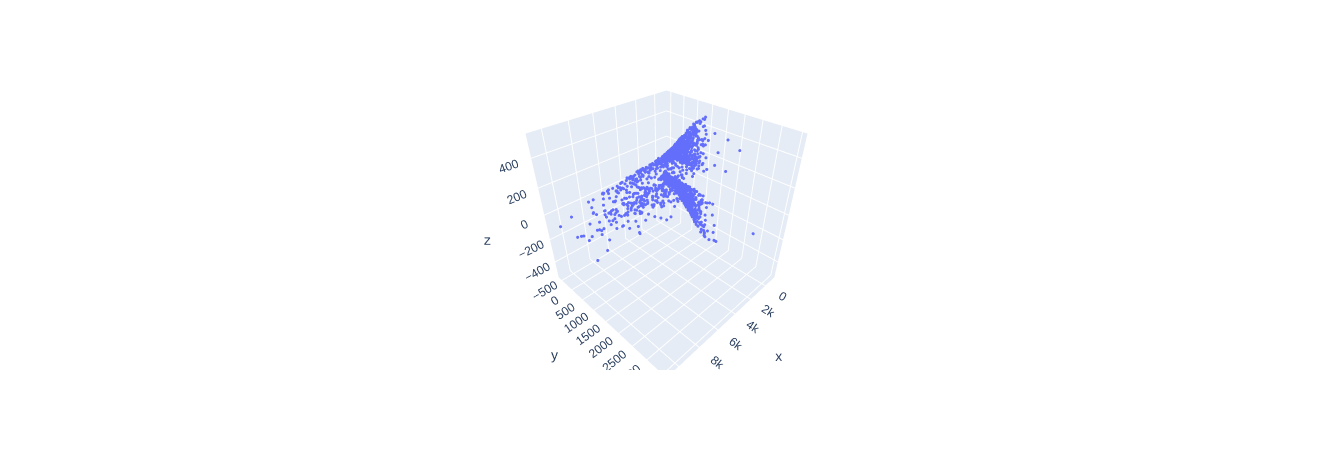

In [47]:
import plotly.express as px
fig = px.scatter_3d(df, x='x', y='y', z='z')
fig.update_traces(marker=dict(size=1))
fig.show()